In [1]:
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt
from matplotlib import cm as mp_cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

from graphviz import Digraph

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/neo-human/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjnl}{\sum_{j=0}^{n-1}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

$
\newcommand{\ai}{\alpha_{(i)}}
\newcommand{\aj}{\alpha_{(j)}}
\newcommand{\bi}{\beta_{(i)}}
\newcommand{\bij}{\beta_{ij}}
\newcommand{\bik}{\beta_{ik}}
\newcommand{\di}{d_{(i)}}
\newcommand{\dit}{\di^T}
\newcommand{\dii}{d_{(i+1)}}
\newcommand{\diit}{\dii^T}
\newcommand{\dj}{d_{(j)}}
\newcommand{\djt}{\dj^T}
\newcommand{\dk}{d_{(k)}}
\newcommand{\dkt}{\dk^T}
\newcommand{\ei}{e_{(i)}}
\newcommand{\eii}{e_{(i+1)}}
\newcommand{\ek}{e_{(k)}}
\newcommand{\ri}{r_{(i)}}
\newcommand{\rit}{\ri^T}
\newcommand{\rii}{r_{(i+1)}}
\newcommand{\rj}{r_{(j)}}
\newcommand{\rjt}{\rj^T}
\newcommand{\rjj}{r_{(j+1)}}
\newcommand{\ui}{u_i}
\newcommand{\uit}{\ui^T}
\newcommand{\xi}{x_{(i)}}
\newcommand{\xii}{x_{(i+1)}}
$


In [2]:
HTML("<style>"\
    "div.cell{"\
        "width:50%;"\
        "margin-left:25%;"\
        "margin-right:auto;"\
    "}"\
"</style>")

# Quadratic form

consider
$$
f(\xb) = \xt \Ab \xb - \bt \xb + c 
$$

f(**x**) is minimized at the solution to $\Ab \xb = \bb$

In [3]:
A = np.array([[3,2],[2,6]])
b = np.array([[2],[-8]]).reshape(-1,1)
c = 0
print('shapes: A,b,c ::', A.shape, b.shape)

x_star = np.linalg.inv(A) @ b
print(x_star)

shapes: A,b,c :: (2, 2) (2, 1)
[[ 2.]
 [-2.]]


shapes: x,y,X,z :: (300, 300) (300, 300) (2, 90000) (300, 300)


<IPython.core.display.Javascript object>


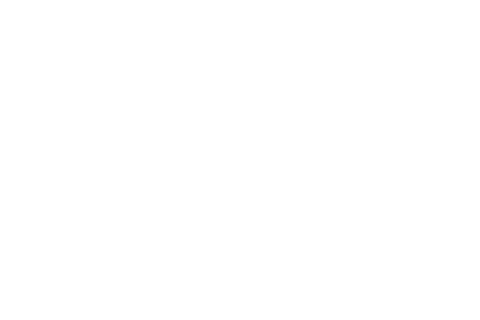

In [4]:
num_pts = 3e2
x,y = np.meshgrid(np.linspace(-6,8,num_pts), np.linspace(-10,6,num_pts))
X = np.vstack([x.ravel(), y.ravel()])

z = X * (A @ X) - b.T @ X - c
z = np.sum(z, axis=0).reshape((x.shape[0],y.shape[0]))
print('shapes: x,y,X,z ::', x.shape, y.shape, X.shape, z.shape)

%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, linewidth=0, cmap=mp_cm.coolwarm)
fig.colorbar(surf)

plt.show()

plt_cf = plt.contourf(x,y,z)
plt.colorbar(plt_cf)
#plt.show()

#plt.contour(x,y,z)
#plt.show()

In [5]:
%matplotlib inline

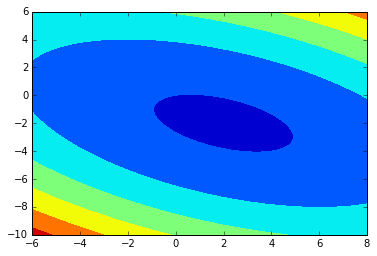

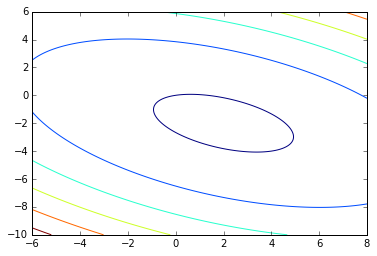

In [6]:
plt.contourf(x,y,z)
plt.show()

plt.contour(x,y,z)
plt.show()

# convergence analysis of steepest descent

## instant results

Consider the case when $\ei$ is an eigenvector with eigenvalue $\lambda_e$  

Then, the residual becomes
$\ri = -\Ab \ei = \lambda_e \ei$

$$
\arrthree{
\xii &= \xi + \ai \ri
\\
\eii &= \ei + \ai \ri
\\ &=
\ds \ei + \frac{\rit \ri}{\rit \Ab \ri} \ri
\\ &=
\ds \ei + \frac{\rit \ri}{\rit \Ab \ri} (-\lambda_e \ei)
\\ &= 0
}
$$

# Method of conjugate directions

## intro

If we dont wanna step into the same direction again, one way would be to make $\eii \perp \di$.  
If **A** were spherical, then it would resemble figure 21

Now, as in SD, we can have the x-iterates as 
$$
\xii = \xi + \ai \di
$$

Now, putting in the constraint that $\eii \perp \di$, we have
$$
\arrthree{
\xii &= \xi + \ai \di
\\
\eii &= \ei + \ai \di
}
$$

Hence
$$
\arrthree{
\dit \eii &= 0
\\
\dit \Paran{\ei + \ai \di} &= 0
\\
\ai &= \ds -\frac{\dit \ei}{\dit \di}
}
$$

Now, we dont know $\ei$. so we just encountered a dead end.

Lets try this. Lets make the search directions A-orthogonal instead of just orthogonal.

That is so say, $\di$ is A-orthogonal to $\eii$.  
Coincidentally, this is equivalent to finding the minimum point along search direction $\di$.

$$
\arrthree{
\ds \diff{}{\alpha} ~f(\xii) &= 0
\\
\ds \diffn{f}{\xii}^T \diff{}{\alpha} ~\xii &= 0
\\
\ds -\rit \di &= 0
\\
\ds \dit \Ab \eii &= 0
}
$$

Hence
$$
\arrthree{
\dit \Ab \eii &= 0
\\
\dit \Ab \Paran{\ei + \ai \di} &= 0
\\
\ai &= \ds -\frac{\dit \Ab \ei}{\dit \Ab \di}
}
$$

Since we have $\ri = \Ab \ei$, we get
$$
\ai = \ds -\frac{\dit \ri}{\dit \Ab \di}
$$
This is computable. cool.

## Proof that this completes in n steps

Let
$$
e_0 = \sumjnl \delta_j \dj
$$

Now, how do we find $\delta_j$?  
Since the search directions are A-orthogonal, we can use that here.  
Multiple both sides by $\dkt \Ab$ and we get
$$
\arrthree{
\dkt \Ab e_0 &= \sumjnl \delta_j \dkt \Ab \dj
\\
\dkt \Ab e_0 &= \delta_k \dkt \Ab \dk
\\
\delta_k &= \ds \frac{\dkt \Ab e_0}{\dkt \Ab \dk}
}
$$

Now, since the current search direction be A-orthogonal to the previous ones,

$$
\arrthree{
\delta_k &= \ds
\frac{\dkt \Ab \Paran{e_0 + \sum_{i=0}^{k-1} \alpha_i \di}}
{\dkt \Ab \dk}
\\
\delta_k &= \ds \frac{\dkt \Ab \ek}{\dkt \Ab \dk}
}
$$

Hence $\delta_i = - \ai$. Thus

$$
\arrthree{
\ei &= \ds e_0 + \sum_{j=0}^{i-1} \aj \dj
\\ &=
\ds \sumjnl \delta_j \dj - \sum_{j=0}^{i-1} \delta_j \dj
\\ 
\ei &= \ds \sum_{j=i}^{n-1} \delta_j \dj & \commentgray{[35]}
}
$$

Thus, at each iteration, one component of the error is stripped off and in n steps, everything goes off

## Gram Schmidt Conjugation

All we now need a set of A-orthogonal {$\di$}. we can use GS process as follows:

* We are given a set of lin ind vectors $\Brace{u_i}_{i=0}^{n-1}$
* Set $d_{(0)} = u_0$
* $\di = u_i + \sum_{k=0}^{i-1} \bik \dk$

To find the $\bik$'s, we can use the same trick we used to find $\delta_j$

For j < i, multiply the above d-iterate by $\Ab \dj$.  

$$
\arrthree{
\dit \Ab \dj &= \uit \Ab \dj + \sum_{k=0}^{i-1} \bik \dkt \Ab \dj
\\
0 &= \uit \Ab \dj + \bij \djt \Ab \dj
\\
\bij &= \ds -\frac{\uit \Ab \dj}{\djt \Ab \dj}
}
$$

What do we have now?  
* given a set of lin ind vectors, we can find the corresponding A-orthogonal whose spans are equal

## Optimality of the error term

Let $\D_i = span \Brace{d_{(0)},d_{(1)},\cdots,d_{(i-1)}}$ 

Now since $\eii = \ei + \ai \di$,   
we have that $\eii$ is chosen from $e_{(0)} + \D_i$

see text for more explanation

Now, we have four important things to remember

### residuals are orthogonal to span of search directions

* the hyperplane $x_{(0)} + \D_i$ is tangent to the ellipsoid on which $\xi$ lies.
* residual at any point is orthogonal to the ellipsoidal surface at that point.
* Thus $\ri$ is orthogonal to $\D_i$ as well.
* To see this, consider $\dk$ where $k \lt i$
$$
\arrthree{
\ei &= \ds \sum_{j=i}^{n-1} \delta_j \dj & \commentgray{from equation 35}
\\
- \dkt \Ab \ei &=
\ds \dkt \Ab \sum_{j=i}^{n-1} \delta_j \dj & \commentgray{Premultiply by $\dkt \Ab$}
\\
\dkt \ri &= 0 & \commentgray{by A-orthogonality}
}
$$

### residuals orthogonal to u's as well

* The search directions $\Brace{\di}$ are constructed from $\Brace{\ui}$
* Hence, if $\ri$ is orthogonal to $\Brace{\di}$, it is orthogonal to $\Brace{\ui}$ as well
* From Gram-Schmidt conjugation and for $\rj$ such that $j \gt i$, we have

$$
\arrthree{
\di &= \ds \ui + \sum_{k=0}^{i-1} \bik \dk
\\
\dit \rj &= \ds \uit \rj + \sum_{k=0}^{i-1} \bik \dkt \rj
\\
0 &= \uit \rj \text{ for j } \gt i
}
$$

### projections onto residuals of u, d

* From Gram-Schmidt conjugation, we have

$$
\arrthree{
\di &= \ds \ui + \sum_{k=0}^{i-1} \bik \dk
\\
\dit \ri &= \ds \uit \ri + \sum_{k=0}^{i-1} \bik \dkt \ri
\\
\dit \ri &= \uit \ri
}
$$

### residual iterate

$$
\arrthree{
\rii &= -\Ab \eii
\\ &=
-\Ab \Paran{\ei + \ai \di}
\\
\rii &= \ri - \ai \Ab \di
}
$$

# Method of CG

* The crux of CG is that the search directions $\ui$ are the residuals $\ri$ themselves  

Implications:
* Hence, $\D_i = span \Brace{r_{(0)},r_{(1)},\cdots,r_{(i-1)}}$
* Since the residuals are orthogonal to previous search directions. That is
$$
\rit \rj = 0 \text{ for } i \ne j {\color{gray}{\text{   -- Equation 44}}}
$$
* Since $\ri = r_{i-1} - a_{i-1} \Ab d_{i-1}$, $\ri$ is the linear combination of previous residual $r_{i-1}$ and $\Ab d_{i-1}$
  * Since $d_{(i-1)} \in \D_{i}$, we have that $\D_{i+1}$ is formed from the union of $\D_i$ and $\Ab \D_i$.
  * Hence
  $$
  \arrthree{
    \D_i &= span \Brace{d_{(0)},d_{(1)},\cdots,d_{(i-1)}} \\
         &= span \Brace{d_{(0)},\Ab d_{(0)},\cdots,\Ab^{i-1} d_{(0)}} \\
         &= span \Brace{r_{(0)},\Ab r_{(0)},\cdots,\Ab^{i-1} r_{(0)}} \\
  }
  $$

Now, since
* $\Ab \D_i$ is included in $\D_{i+1}$ and 
* $\rii$ is orthogonal to $\D_{i+1}$
* we have $\rii$ is A-orthogonal to $\D_i$

Implication
* Gram-Schmidt conjugation is eacy since $\rii$ is A-orthogonal to all previous search directions except $\di$

## Gram Schmidt

Recall that
$$
\bij = -\frac{\uit \Ab \dj}{\djt \Ab \dj} = -\frac{\rit \Ab \dj}{\djt \Ab \dj}
\color{\gray}{\text{  j < i  }}
$$
and 
$$
\rit \rj = 0 \text{ for } i \ne j
$$

This gives

$$
\arrthree{
\rjj &= \rj - \aj \Ab \dj
\\
\rit \rjj &= \rit \rj - \aj \rit \Ab \dj
\\
\aj \rit \Ab \dj &= \rit \rj - \rit \rjj
\\
\rit \Ab \dj &=
\cases{
\ds \fracrec{\ai} \rit \rit & \text{ i = j}
\\
\ds -\fracrec{a_{(i-1)}} \rit \ri & \text{ i = j+1}
\\
0 & \text{ otherwise }
}
}
$$

Sub this into $\bij$ formulation considering only the later case since $\bij$ is defined only for j < i. Thus the first case is off the table and 
$$
\bij = \cases{
\ds \fracrec{\alpha_{i-1}} \frac{\rit \ri}{d_{(i-1)}^T \Ab d_{(i-1)}}
\\
0 & \text{  i > j+1 }
}
$$


Major advance et al.

Let $\bi = \beta_{i,i-1}$

$$
\arrthree{
\bi &= \ds \fracrec{\alpha_{(i-1)}} \frac{\rit \ri}{d_{(i-1)}^T \Ab d_{(i-1)}}
\\
&= \ds \frac{d_{(i-1)}^T \Ab d_{(i-1)}}{d_{(i-1)}^T r_{(i-1)}} \frac{\rit \ri}{d_{(i-1)}^T \Ab d_{(i-1)}}
& \commentgray{$\ai = \frac{\dit \ri}{\dit \Ab \di}$}
\\ &=
\ds \frac{\rit \ri}{d_{(i-1)}^T r_{(i-1)}}
\\ 
\bi
&=
\ds \frac{\rit \ri}{r_{(i-1)}^T r_{(i-1)}} &
\commentgray{$\dit \ri = \uit \ri = \rit \ri$}
}
$$

# Convergence Analysis of Conjugate Gradients


## Picking Perfect Polynomials


Equation 51 [36]

$$
\Norm{\ei}_\Ab = 2
\Bracket{
  \Paran{\frac{\sqrt{\kappa}+1}{\sqrt{\kappa}-1}}^{i} +
  \Paran{\frac{\sqrt{\kappa}-1}{\sqrt{\kappa}+1}}^{i}
}^{-1}
~\Norm{e_{(0)}}_\Ab
$$

$$
\frac{\sqrt{\kappa}+1}{2}
$$

In [45]:
np.hstack([np.arange(0,1,0.1),np.arange(1,100,20)])

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,  21. ,  41. ,  61. ,  81. ])

/home/dragon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


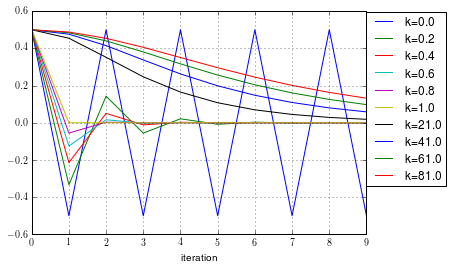

In [71]:
k = np.hstack([np.arange(0,1,0.2),np.arange(1,100,20)])
k_plus  = np.sqrt(k) + 1
k_minus = np.sqrt(k) - 1
term1 = k_plus / k_minus
term2 = k_minus / k_plus
num_iterations = 10
y = np.zeros((10,np.shape(k)[0]))
for ix in range(num_iterations):
    y[ix,:] = 1 / (term1**ix + term2**ix)
for kk in range(len(k)):
    plt.plot(np.arange(num_iterations), y[:,kk], label='k='+str(k[kk]))
plt.legend(loc=(1,0.215))
plt.rc('text', usetex=True)
plt.xlabel('iteration')
plt.grid()
plt.show()